In this Notebook I am going to take Go through EDA of the Hotel booking demand datasets.

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt

/tmp/ipykernel_2104/2431854802.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
numeric_variables = [
    "adr",
    "adults",
    "arrival_date_day_of_month",
    "arrival_date_week_number",
    "arrival_date_year",
    "babies",
    "booking_changes",
    "children",
    "days_in_waiting_list",
    "previous_cancellations",
    "previous_bookings_not_canceled",
    "required_car_parking_spaces",
    "stays_in_week_nights",
    "stays_in_weekend_nights",
    "total_of_special_requests"
]


object_variables = [
    "hotel",
    "arrival_date_month",
    "meal",
    "country",
    "market_segment",
    "distribution_channel",
    "reserved_room_type",
    "assigned_room_type",
    "deposit_type",
    "agent",
    "company",
    "customer_type",
    "reservation_status",
    "reservation_status_date"
]

df[numeric_variables] = df[numeric_variables].astype(float) 
df[object_variables] = df[object_variables].astype("object")

In [7]:
corr = df.select_dtypes(include=[np.number]).corr()
mask = np.eye(corr.shape[0], dtype=bool)
corr.values[mask] = np.nan
corr.columns = corr.columns.str.replace("_", "\n")
corr.style.background_gradient(cmap="coolwarm").set_table_styles([
    {"selector": "th", "props": [("font-size", "8pt")]}
])

,is canceled,lead time,arrival date year,arrival date week number,arrival date day of month,stays in weekend nights,stays in week nights,adults,children,babies,is repeated guest,previous cancellations,previous bookings not canceled,booking changes,days in waiting list,adr,required car parking spaces,total of special requests
is_canceled,nan,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,nan,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,nan,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,nan,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,nan,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,nan,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,nan,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,nan,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,nan,0.024030,-0.032859,-0.024730,-0.021072,0.048949,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,nan,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889


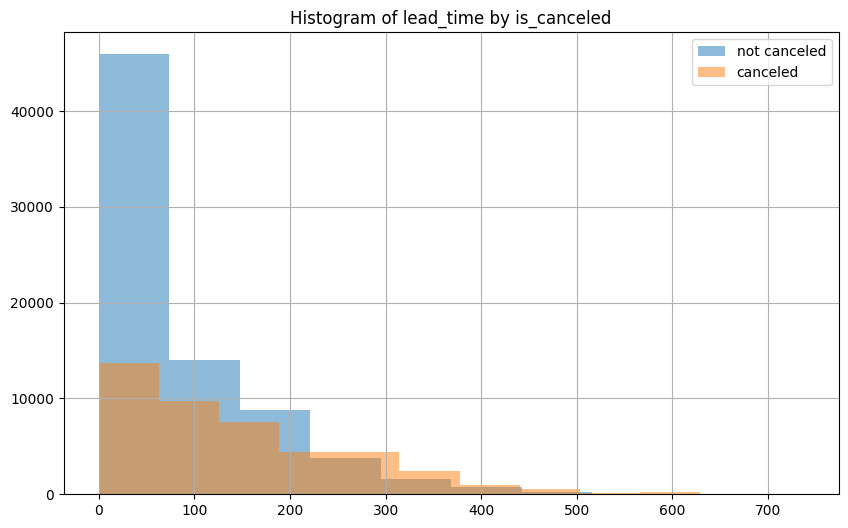

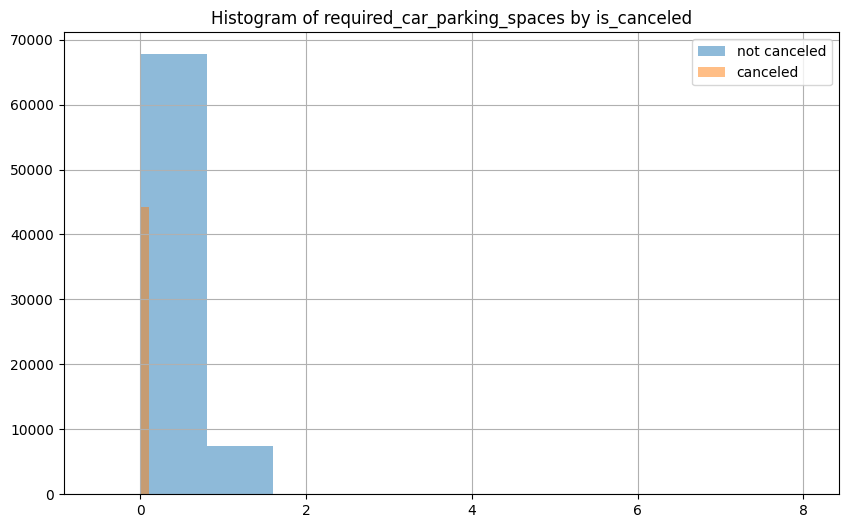

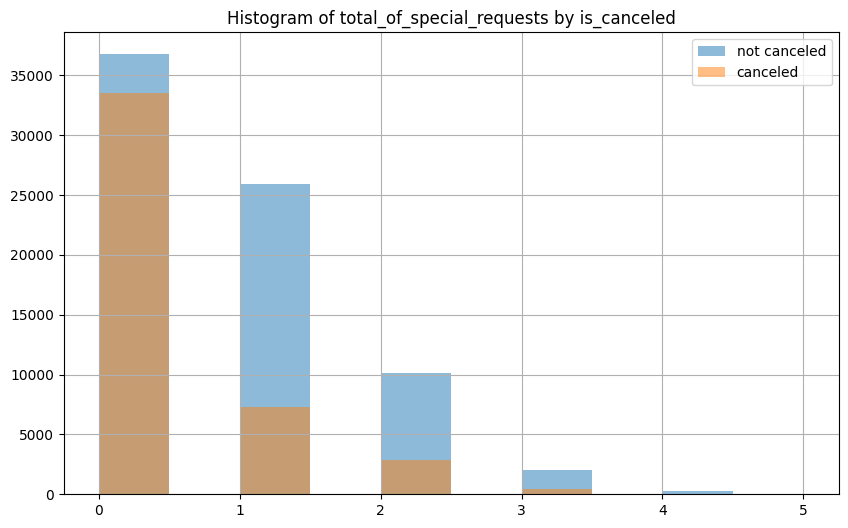

In [8]:
high_corr = corr[corr["is\ncanceled"].abs() > 0.19].index
for var in high_corr:
    if var != "is_canceled":
        plt.figure(figsize=(10, 6))
        df[df["is_canceled"] == 0][var].hist(alpha=0.5, label="not canceled")
        df[df["is_canceled"] == 1][var].hist(alpha=0.5, label="canceled")
        plt.title(f"Histogram of {var} by is_canceled")
        plt.legend()
        plt.show()

In [9]:
contingency_table = pd.crosstab(df["meal"], df["is_canceled"])

In [10]:
object_variables = [var for var in object_variables if var not in ["reservation_status_date", "reservation_status"]]
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))



def display_enhanced_tables(dataframe, object_variables):
    results = []
    styled_grouped_list = []
    for column in object_variables:
        grouped = dataframe.groupby(column)["is_canceled"].agg(["mean", "count"])
        grouped = grouped.sort_values(by="count", ascending=False)
        grouped.columns = ["Cancellation Rate", "Count"]

        chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(dataframe[column], dataframe["is_canceled"]))
        cramer_v = cramers_v(dataframe[column], dataframe["is_canceled"])

        results.append({
            "Variable": column,
            "Chi-square": chi2,
            "p-value": p,
            "Cramers V": cramer_v
        })

        styled_grouped = grouped.style.background_gradient(cmap="coolwarm", subset=["Cancellation Rate"])
        styled_grouped_list.append((column, styled_grouped))

    results_df = pd.DataFrame(results)
    styled_results = results_df.style.background_gradient(cmap="coolwarm", subset=["Chi-square", "Cramers V"])

    display(styled_results)

    for column, styled_grouped in styled_grouped_list:
        print(f"Cancellation Rates and Counts for {column}:\n")
        
        df_grouped = styled_grouped.data
        # I am adding adjustable threshold for countries, agencies and companies as their number is quite overwhelming.
        df_grouped = df_grouped[df_grouped["Count"] > 0]
        display(df_grouped.style.background_gradient(cmap="coolwarm", subset=["Cancellation Rate"]))
        print("\n")

display_enhanced_tables(df, object_variables)


,Variable,Chi-square,p-value,Cramers V
0,hotel,2224.924904,0.000000,0.136483
1,arrival_date_month,588.691754,0.000000,0.069561
2,meal,304.236177,0.000000,0.050148
3,country,15434.681533,0.000000,0.358233
4,market_segment,8497.224090,0.000000,0.266672
5,distribution_channel,3745.794124,0.000000,0.177034
6,reserved_room_type,647.835097,0.000000,0.073150
7,assigned_room_type,4918.693385,0.000000,0.202748
8,deposit_type,27677.329241,0.000000,0.481464
9,agent,16214.494641,0.000000,0.392588


Cancellation Rates and Counts for hotel:



,Cancellation Rate,Count
hotel,,
City Hotel,0.417270,79330
Resort Hotel,0.277634,40060




Cancellation Rates and Counts for arrival_date_month:



,Cancellation Rate,Count
arrival_date_month,,
August,0.377531,13877
July,0.374536,12661
May,0.396658,11791
October,0.380466,11160
April,0.407972,11089
June,0.414572,10939
September,0.391702,10508
March,0.321523,9794
February,0.334160,8068




Cancellation Rates and Counts for meal:



,Cancellation Rate,Count
meal,,
BB,0.373849,92310
HB,0.344603,14463
SC,0.372394,10650
Undefined,0.244654,1169
FB,0.598997,798




Cancellation Rates and Counts for country:



,Cancellation Rate,Count
country,,
PRT,0.566351,48590
GBR,0.202243,12129
FRA,0.185694,10415
ESP,0.254085,8568
DEU,0.167147,7287
ITA,0.353956,3766
IRL,0.246519,3375
BEL,0.202391,2342
BRA,0.373201,2224




Cancellation Rates and Counts for market_segment:



,Cancellation Rate,Count
market_segment,,
Online TA,0.367211,56477
Offline TA/TO,0.343160,24219
Groups,0.610620,19811
Direct,0.153419,12606
Corporate,0.187347,5295
Complementary,0.130552,743
Aviation,0.219409,237
Undefined,1.000000,2




Cancellation Rates and Counts for distribution_channel:



,Cancellation Rate,Count
distribution_channel,,
TA/TO,0.410259,97870
Direct,0.174599,14645
Corporate,0.220758,6677
GDS,0.191710,193
Undefined,0.800000,5




Cancellation Rates and Counts for reserved_room_type:



,Cancellation Rate,Count
reserved_room_type,,
A,0.391074,85994
D,0.317796,19201
E,0.292884,6535
F,0.303763,2897
G,0.364374,2094
B,0.329159,1118
C,0.330472,932
H,0.407654,601
P,1.000000,12




Cancellation Rates and Counts for assigned_room_type:



,Cancellation Rate,Count
assigned_room_type,,
A,0.444925,74053
D,0.251244,25322
E,0.252114,7806
F,0.247134,3751
G,0.305523,2553
C,0.187789,2375
B,0.236708,2163
H,0.352528,712
I,0.013774,363




Cancellation Rates and Counts for deposit_type:



,Cancellation Rate,Count
deposit_type,,
No Deposit,0.283770,104641
Non Refund,0.993624,14587
Refundable,0.222222,162




Cancellation Rates and Counts for agent:



,Cancellation Rate,Count
agent,,
9.000000,0.415006,31961
240.000000,0.393909,13922
1.000000,0.734251,7191
14.000000,0.179121,3640
7.000000,0.133936,3539
6.000000,0.311550,3290
250.000000,0.178746,2870
241.000000,0.137130,1721
28.000000,0.066026,1666




Cancellation Rates and Counts for company:



,Cancellation Rate,Count
company,,
40.000000,0.083064,927
223.000000,0.151786,784
67.000000,0.655431,267
45.000000,0.112000,250
153.000000,0.223256,215
174.000000,0.140940,149
219.000000,0.063830,141
281.000000,0.123188,138
154.000000,0.037594,133




Cancellation Rates and Counts for customer_type:



,Cancellation Rate,Count
customer_type,,
Transient,0.407463,89613
Transient-Party,0.254299,25124
Contract,0.309617,4076
Group,0.102253,577
